In [1]:
import numpy as np

import matplotlib.ticker as mtick
import wf_psf as wf
import matplotlib.pyplot as plt
import matplotlib as mpl

# %matplotlib inline
params = {
    "font.size": 18,
    "legend.fontsize": 18,
    "legend.frameon": False,
    "axes.labelsize": 18,
    "axes.titlesize": 18,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "figure.figsize": (7, 5),
    "xtick.top": True,
    "axes.unicode_minus": False,
    "ytick.right": True,
    "xtick.bottom": True,
    "ytick.left": True,
    "xtick.major.pad": 8,
    "xtick.major.size": 8,
    "xtick.minor.size": 4,
    "ytick.major.size": 8,
    "ytick.minor.size": 4,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "axes.linewidth": 1.5,
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": "cmr10",
    "mathtext.fontset": "cm",
    "axes.formatter.use_mathtext": True,  # needed when using cm=cmr10 for normal text
}


mpl.rcParams.update(params)

/Users/tl255879/miniconda3/envs/wf_tools/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:


args = {
    'id_name': '_wf_PR_NewPRoj_12_cycles_v2' ,
    'suffix_id_name': 'v2' ,
    'base_id_name': '_wf_PR_NewPRoj_12_cycles_' ,
    'eval_only_param': False ,
    'total_cycles': 12 ,
    'saved_cycle': 'cycle12' ,
    'reset_dd_features': True ,
    'eval_only_param': False ,
    'project_dd_features': True ,
    'd_max': 2 ,
    'n_zernikes': 45 ,
    'save_all_cycles': True ,
    'n_bins_lda': 8,
    'n_bins_gt': 8,
    'output_dim': 32,
    'batch_size': 32,
    'oversampling_rate': 3.,
    'output_q': 3.,
    'sed_sigma': 0.,
    'x_lims': [0, 1e3],
    'y_lims': [0, 1e3],
    'sed_interp_kind': 'linear',
    'interp_pts_per_bin': 0,
    'extrapolate': True,
    'opt_stars_rel_pix_rmse': True ,
    'eval_mono_metric_rmse': False,
    'eval_opd_metric_rmse': True,
    'eval_train_shape_sr_metric_rmse': True,
    'pupil_diameter': 256 ,
    'n_epochs_param_multi_cycle': "0" ,
    'n_epochs_non_param_multi_cycle': "75" ,
    'l_rate_non_param_multi_cycle': "0.1" ,
    'l_rate_param_multi_cycle': "0" ,
    'l_rate_param': None,
    'l_rate_non_param': None,
    'n_epochs_param': None,
    'n_epochs_non_param': None,
    'model': 'poly' ,
    'model_eval': 'poly' ,
    'cycle_def': 'complete' ,
    'gt_n_zernikes': 45 ,
    'd_max_nonparam': 5 ,
    'saved_model_type': 'external' ,
    'use_sample_weights': True ,
    'l2_param': 0. ,
    'interpolation_type': 'none' ,
    'eval_batch_size': 16 ,
    'train_opt': True ,
    'eval_opt': True ,
    'plot_opt': True ,
    'dataset_folder': '/disk/xray0/tl3/datasets/wf-phase-retrieval/data/',
    'test_dataset_file': 'test_Euclid_res_id_010_8_bins.npy',
    'train_dataset_file': 'train_Euclid_res_2000_TrainStars_id_010_8_bins.npy',
    'base_path': '/Users/tl255879/Documents/research/projects/wf-projects/phase-retrieval-paper/v1_trained_models/output_v1/',
    'metric_base_path': '/Users/tl255879/Documents/research/projects/wf-projects/phase-retrieval-paper/v1_trained_models/output_v1/metrics/',
    'chkp_save_path': '/Users/tl255879/Documents/research/projects/wf-projects/phase-retrieval-paper/v1_trained_models/output_v1/chkp/chkp_callback_poly_wf_PR_NewPRoj_12_cycles_v2_cycle%d',
    'plots_folder': 'plots/' ,
    'model_folder': 'chkp/' ,
    'log_folder': 'log-files/' ,
    'optim_hist_folder': 'optim-hist/' ,
    'star_numbers': 1 ,
}


In [3]:

base_path = '/Users/tl255879/Documents/research/projects/wf-projects/phase-retrieval-paper/v1_trained_models/paper_output_v1/'
log_folder = 'log-files/'
metric_base_path = '/Users/tl255879/Documents/research/projects/wf-projects/phase-retrieval-paper/v1_trained_models/paper_output_v1/full_metrics/'



args['base_path'] = base_path
args['log_folder'] = log_folder
args['metric_base_path'] = metric_base_path


save_dir = './../plots/'
plot_results = True


e1_req_euclid = 2e-04
e2_req_euclid = 2e-04
R2_req_euclid = 1e-03



In [4]:
# metrics_base_id_name_list = [
#     'metrics-poly_wf_PR_NewPRoj_12_cycles_v2',
#     'only_param_eval/metrics-poly_wf_PR_NewPRoj_12_cycles_v2',
# ]

metrics_base_id_name_list = [
    'metrics-poly_wf_PR_NewPRoj_12_cycles_full_eval_v0_',
    'metrics-poly_wf_PR_NewPRoj_12_cycles_onlyparam_eval_v0_',
]


eval_cycle_base_id_list = [12,12]#,12,18,18,16,12,14]
metrics = []
it = 0
# Iterate over the base_ids
for base_id, total_cycles in zip(metrics_base_id_name_list, eval_cycle_base_id_list):
    # Define the list of cycles
    eval_cycle_list = np.arange(1,total_cycles+1)
    metrics.append([])
    # Iterate over the cycles
    for eval_cycle in eval_cycle_list:
        loaded_metrics = np.load(
            args['metric_base_path'] + base_id + 'cycle' + str(eval_cycle) + '.npy' ,
            allow_pickle=True
        )[()]
        metrics[it].append(loaded_metrics)

    it += 1

In [5]:
# Extract results

# Extract OPD results
test_opd_rel_results = []
train_opd_rel_results = []
# Extract pix resutls
test_pix_rel_results = []
train_pix_rel_results = []
# Extract SR pix resutls
test_SR_pix_rel_results = []
train_SR_pix_rel_results = []
# Extract e1 shape results
test_e1_rel_results = []
train_e1_rel_results = []
# Extract e2 shape results
test_e2_rel_results = []
train_e2_rel_results = []
# Extract R2 shape results
test_R2_rel_results = []
train_R2_rel_results = []

for it_1 in range(len(metrics)):
    test_opd_rel_results.append([])
    train_opd_rel_results.append([])

    test_pix_rel_results.append([])
    train_pix_rel_results.append([])

    test_SR_pix_rel_results.append([])
    train_SR_pix_rel_results.append([])

    for it_2 in range(len(metrics[it_1])):

        test_opd_rel_results[it_1].append(
            metrics[it_1][it_2]['test_metrics']['opd_metric']['rel_rmse_opd']
        )
        train_opd_rel_results[it_1].append(
            metrics[it_1][it_2]['train_metrics']['opd_metric']['rel_rmse_opd']
        )
        
        test_pix_rel_results[it_1].append(
            metrics[it_1][it_2]['test_metrics']['poly_metric']['rel_rmse']
        )
        train_pix_rel_results[it_1].append(
            metrics[it_1][it_2]['train_metrics']['poly_metric']['rel_rmse']
        )

        test_SR_pix_rel_results[it_1].append(
            metrics[it_1][it_2]['test_metrics']['shape_results_dict']['rel_pix_rmse']
        )
        train_SR_pix_rel_results[it_1].append(
            metrics[it_1][it_2]['train_metrics']['shape_results_dict']['rel_pix_rmse']
        )


# Plot only_NP model error
full_NP_model_e1, full_NP_model_e2, full_NP_model_R2 = wf.script_utils.extract_shape_results(
    metrics[0], test_train='test'
)
full_NP_model_e1_rmse = full_NP_model_e1[0]
full_NP_model_e1_std_rmse = full_NP_model_e1[1]
full_NP_model_e1_rel_rmse = full_NP_model_e1[2]
full_NP_model_e1_std_rel_rmse = full_NP_model_e1[3]
full_NP_model_e2_rmse = full_NP_model_e2[0]
full_NP_model_e2_std_rmse = full_NP_model_e2[1]
full_NP_model_e2_rel_rmse = full_NP_model_e2[2]
full_NP_model_e2_std_rel_rmse = full_NP_model_e2[3]
full_NP_model_rmse_R2_meanR2 = full_NP_model_R2[0]
full_NP_model_std_rmse_R2_meanR2 = full_NP_model_R2[1]

# Compute Euclid relative error values
full_NP_model_e1_rel_euclid = full_NP_model_e1_rmse / e1_req_euclid
full_NP_model_e2_rel_euclid = full_NP_model_e2_rmse / e2_req_euclid
full_NP_model_R2_rel_euclid = full_NP_model_rmse_R2_meanR2 / R2_req_euclid


# Plot only_NP model error
param_NP_model_e1, param_NP_model_e2, param_NP_model_R2 = wf.script_utils.extract_shape_results(
    metrics[1], test_train='test'
)
param_NP_model_e1_rmse = param_NP_model_e1[0]
param_NP_model_e1_std_rmse = param_NP_model_e1[1]
param_NP_model_e1_rel_rmse = param_NP_model_e1[2]
param_NP_model_e1_std_rel_rmse = param_NP_model_e1[3]
param_NP_model_e2_rmse = param_NP_model_e2[0]
param_NP_model_e2_std_rmse = param_NP_model_e2[1]
param_NP_model_e2_rel_rmse = param_NP_model_e2[2]
param_NP_model_e2_std_rel_rmse = param_NP_model_e2[3]
param_NP_model_rmse_R2_meanR2 = param_NP_model_R2[0]
param_NP_model_std_rmse_R2_meanR2 = param_NP_model_R2[1]

# Compute Euclid relative error values
param_NP_model_e1_rel_euclid = param_NP_model_e1_rmse / e1_req_euclid
param_NP_model_e2_rel_euclid = param_NP_model_e2_rmse / e2_req_euclid
param_NP_model_R2_rel_euclid = param_NP_model_rmse_R2_meanR2 / R2_req_euclid


In [6]:
print(param_NP_model_e1_rel_euclid)
print(param_NP_model_e2_rel_euclid)
print(param_NP_model_R2_rel_euclid)

[200.54565905 194.66379177 108.11687841  35.19877624  22.48038968
  17.33626093  13.28373057  11.34321479   9.5789483    9.15014764
   8.4994596    8.63951859]
[88.11406586 74.08934401 43.07290428 28.90946791 21.75941503 14.3947692
  9.18943477  6.24545108  4.80838038  4.24720621  4.07232897  4.12806838]
[166.19958754 157.64705416 127.04460003  37.88764451  12.14254949
  16.33859648  15.4630912   14.04841319  12.29896323  12.027161
  11.026873    11.26675138]


In [7]:
print(full_NP_model_e1_rel_euclid)
print(full_NP_model_e2_rel_euclid)
print(full_NP_model_R2_rel_euclid)


[105.84113579  89.11075441  15.32394978   9.54722268   8.88226494
   6.96963768   6.17432819   6.32911763   5.61183752   5.66588618
   5.164814     5.37566837]
[43.02203378 40.06868085 11.45882435  7.33554345  6.07329726  5.00768246
  4.57147856  4.65004442  4.37516301  4.69405947  4.53918249  4.50289229]
[65.1984892  37.05677645 15.91719797  5.37950974  4.77757548  4.14019837
  3.97474651  4.5805191   3.84740342  4.77949794  4.27933483  4.8101018 ]


## OPD error

In [8]:
labels = [
    'Full model',
    'Parametric part only',
]

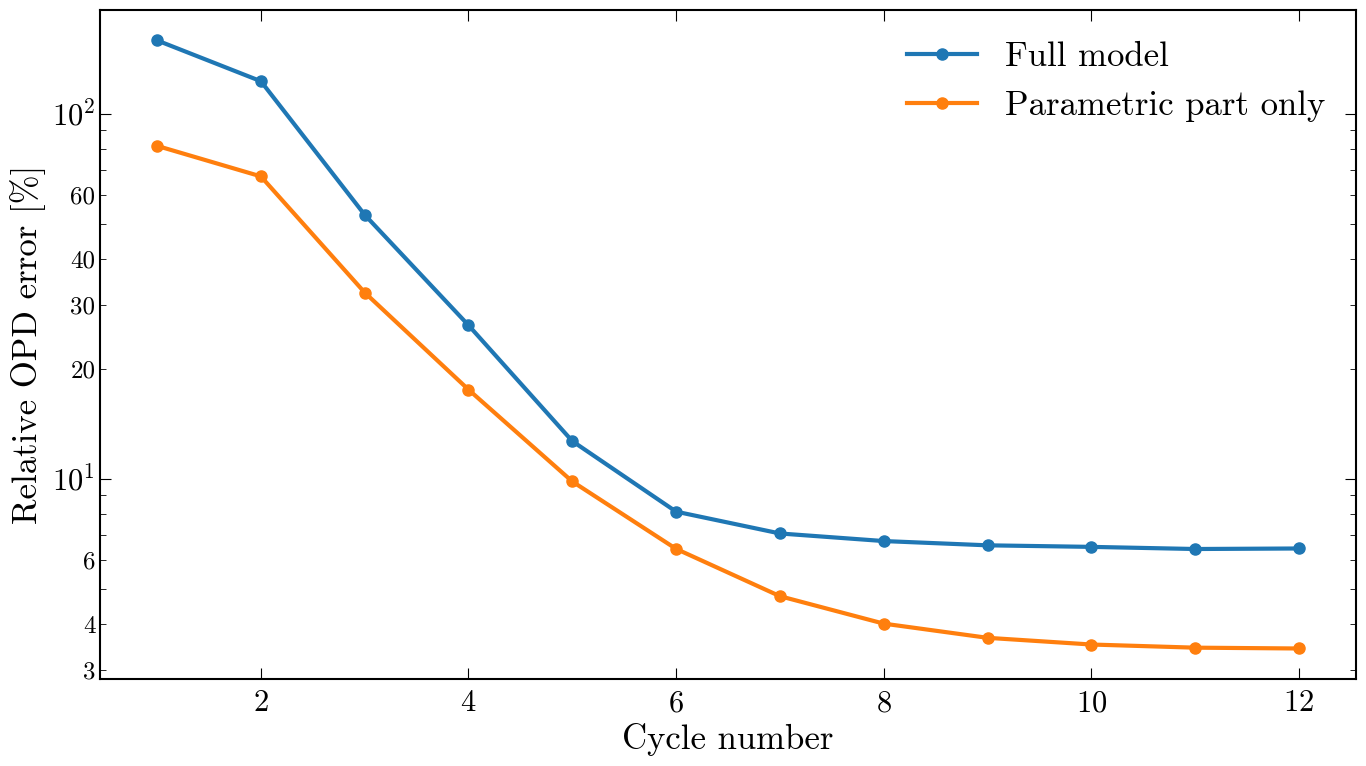

In [9]:
# OPD
cmap = plt.get_cmap('tab10')

text_fontsize = 25
maj_tick_size = 22
min_tick_size = 18

plt.figure(figsize=(14,8))

ax = plt.gca()

# plt.plot(
#     np.arange(1,len(test_opd_rel_results[0])+1),
#     4. * np.ones(len(test_opd_rel_results[0])),
#     color='black',
#     linestyle='--',
#     marker='',
#     alpha=0.5
# )

for it, res in enumerate(test_opd_rel_results):
    plt.plot(
        np.arange(1,len(res)+1),
        res,
        color=cmap(it),
        label=labels[it],
        linewidth=3,
        markersize=16,
        marker=".",
    )

# ax.set_ylim(1, 200)
ax.set_yscale('log')
# ax.yaxis.tick_left()
plt.legend(fontsize=text_fontsize)
plt.ylabel(r'Relative OPD error [%]', fontsize=text_fontsize)
plt.xlabel(r'Cycle number', fontsize=text_fontsize)


ax.tick_params(axis='both', which='major', labelsize=maj_tick_size)
ax.tick_params(axis='y', which='minor', labelsize=min_tick_size)
formatter = mtick.LogFormatter(labelOnlyBase=False, minor_thresholds=(3, 0.4))
ax.yaxis.set_minor_formatter(formatter)

plt.tight_layout()
if plot_results:
    plt.savefig(
        '{:s}{:s}'.format(save_dir, 'cycle_evol_rel_opd_error.pdf'),
        bbox_inches='tight',
        dpi=300
    )
plt.show()


## Pixel error at observation resolution

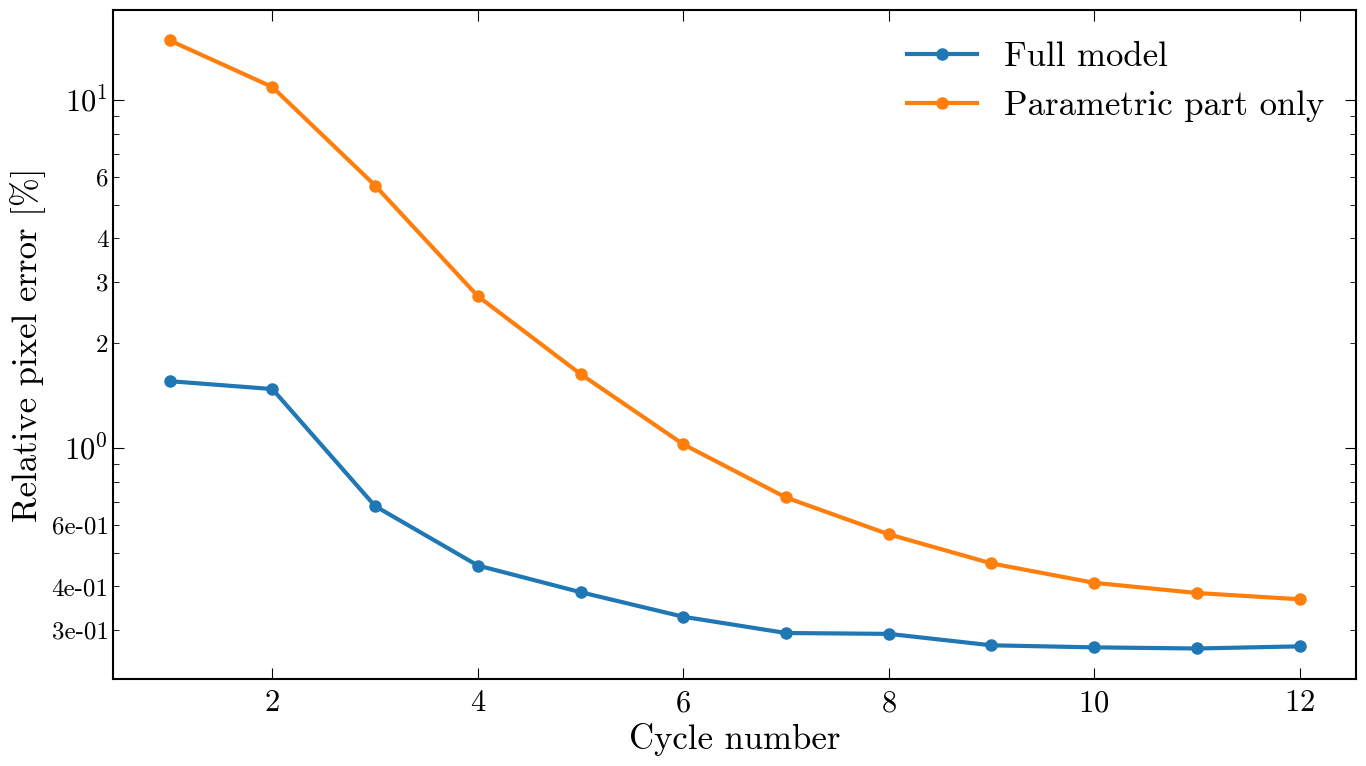

In [10]:

# Pixel
cmap = plt.get_cmap('tab10')

text_fontsize = 25
maj_tick_size = 22
min_tick_size = 18

plt.figure(figsize=(14,8))
ax = plt.gca()

# plt.plot(
#     np.arange(1,len(test_pix_rel_results[0])+1),
#     0.3 * np.ones(len(test_pix_rel_results[0])),
#     color='black',
#     linestyle='--',
#     marker='',
#     alpha=0.5
# )

for it, res in enumerate(test_pix_rel_results):
    plt.plot(
        np.arange(1,len(res)+1),
        res,
        color=cmap(it),
        label=labels[it],
        linewidth=3,
        markersize=16,
        marker=".",
    )

# ax.set_ylim(1, 200)
ax.set_yscale('log')
# ax.yaxis.tick_left()
plt.legend(fontsize=text_fontsize)
plt.ylabel(r'Relative pixel error [%]', fontsize=text_fontsize)
plt.xlabel(r'Cycle number', fontsize=text_fontsize)


ax.tick_params(axis='both', which='major', labelsize=maj_tick_size)
ax.tick_params(axis='y', which='minor', labelsize=min_tick_size)
formatter = mtick.LogFormatter(labelOnlyBase=False, minor_thresholds=(3., 0.4))
# formatter = mtick.LogFormatterSciNotation(labelOnlyBase=False, minor_thresholds=(3., 0.4))

ax.yaxis.set_minor_formatter(formatter)

plt.tight_layout()
if plot_results:
    plt.savefig(
        '{:s}{:s}'.format(save_dir, 'cycle_evol_rel_pixel_error_obsRes.pdf'),
        bbox_inches='tight',
        dpi=300
    )
plt.show()


## Pixel error at super resolution (x3)

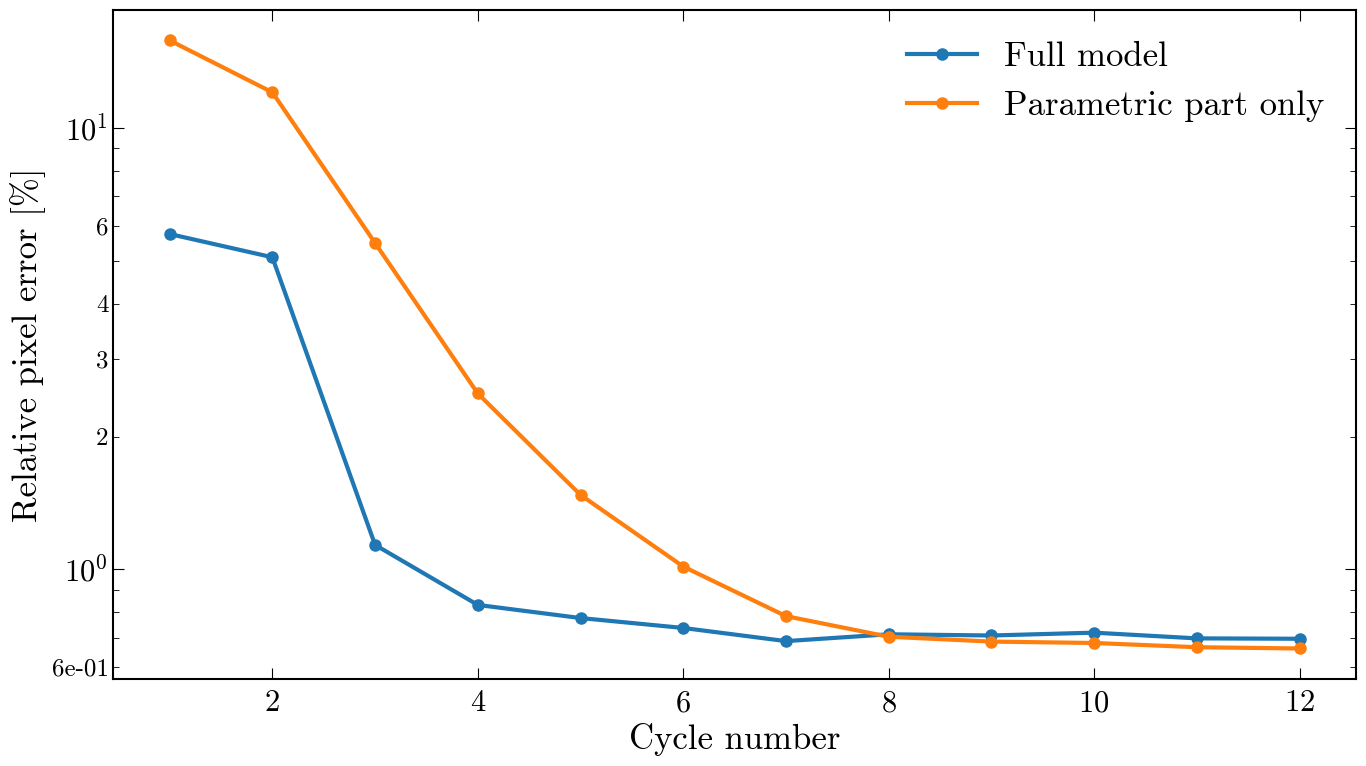

In [11]:


# SR Pixel
cmap = plt.get_cmap('tab10')

text_fontsize = 25
maj_tick_size = 22
min_tick_size = 18

plt.figure(figsize=(14,8))
ax = plt.gca()

# plt.plot(
#     np.arange(1,len(test_SR_pix_rel_results[0])+1),
#     0.6 * np.ones(len(test_SR_pix_rel_results[0])),
#     color='black',
#     linestyle='--',
#     marker='',
#     alpha=0.5
# )

for it, res in enumerate(test_SR_pix_rel_results):
    plt.plot(
        np.arange(1,len(res)+1),
        res,
        color=cmap(it),
        label=labels[it],
        linewidth=3,
        markersize=16,
        marker=".",
    )

# ax.set_ylim(1, 200)
ax.set_yscale('log')
# ax.yaxis.tick_left()
plt.legend(fontsize=text_fontsize)
plt.ylabel('Relative pixel error [%]', fontsize=text_fontsize)
plt.xlabel('Cycle number', fontsize=text_fontsize)

ax.tick_params(axis='both', which='major', labelsize=maj_tick_size)
ax.tick_params(axis='y', which='minor', labelsize=min_tick_size)
formatter = mtick.LogFormatter(labelOnlyBase=False, minor_thresholds=(3., 0.4))
# formatter = mtick.LogFormatterSciNotation(labelOnlyBase=False, minor_thresholds=(3., 0.4))
ax.yaxis.set_minor_formatter(formatter)

plt.tight_layout()
if plot_results:
    plt.savefig(
        '{:s}{:s}'.format(save_dir, 'cycle_evol_rel_pixel_error_SuperRes.pdf'),
        bbox_inches='tight',
        dpi=300
    )
plt.show()


## Both resolutions

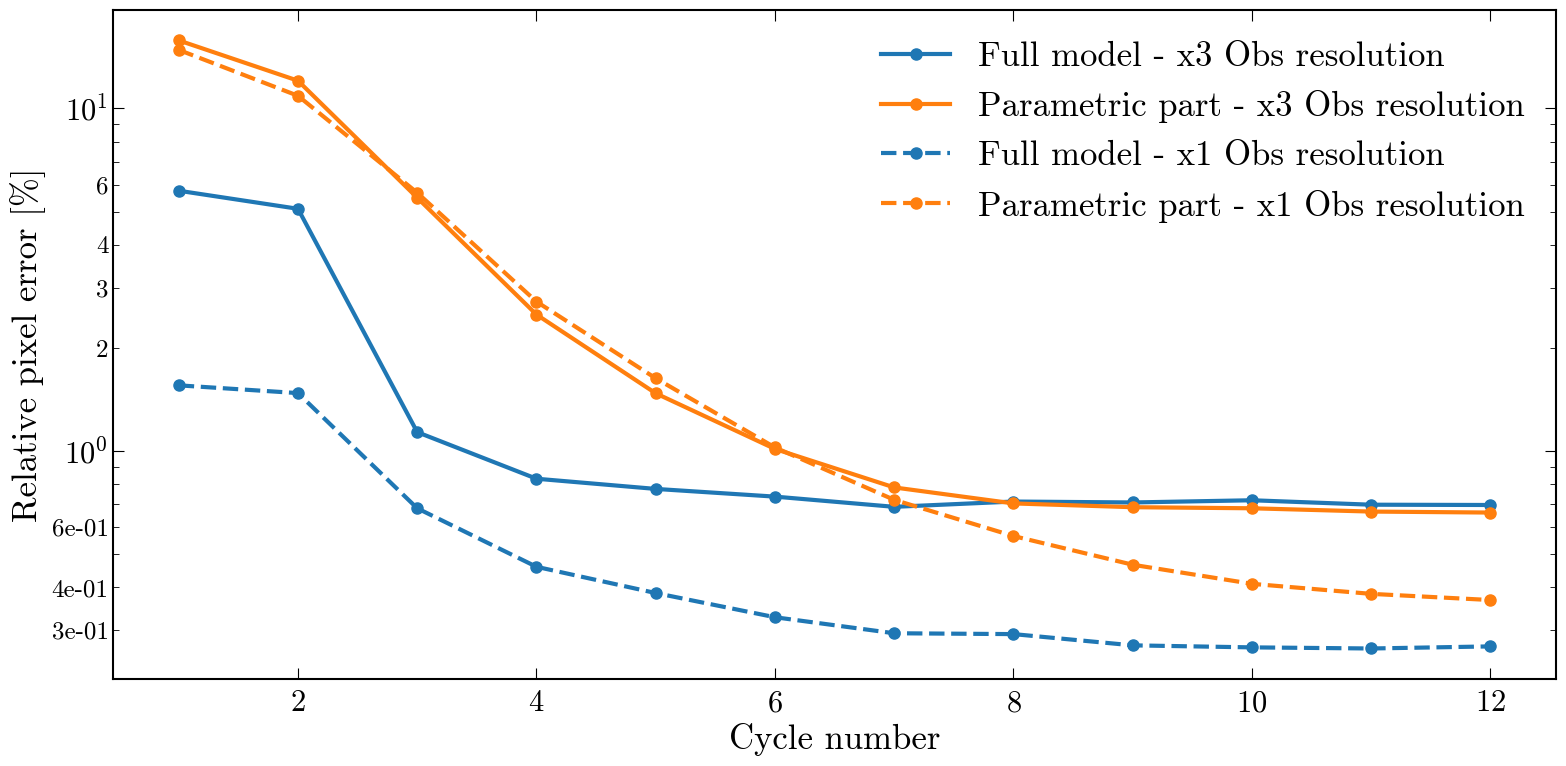

In [12]:
labels_SR = [
    'Full model - x3 Obs resolution',
    'Parametric part - x3 Obs resolution',
]
labels_obsR = [
    'Full model - x1 Obs resolution',
    'Parametric part - x1 Obs resolution',
]

# Both pixel resolutions
cmap = plt.get_cmap('tab10')

text_fontsize = 25
maj_tick_size = 22
min_tick_size = 18

plt.figure(figsize=(16,8))
ax = plt.gca()


for it, res in enumerate(test_SR_pix_rel_results):
    plt.plot(
        np.arange(1,len(res)+1),
        res,
        color=cmap(it),
        label=labels_SR[it],
        linewidth=3,
        markersize=16,
        marker=".",
    )

for it, res in enumerate(test_pix_rel_results):
    plt.plot(
        np.arange(1,len(res)+1),
        res,
        color=cmap(it),
        label=labels_obsR[it],
        linestyle='dashed',
        linewidth=3,
        markersize=16,
        marker=".",
    )

# ax.set_ylim(1, 200)
ax.set_yscale('log')
# ax.yaxis.tick_left()
plt.legend(fontsize=text_fontsize)
plt.ylabel('Relative pixel error [%]', fontsize=text_fontsize)
plt.xlabel('Cycle number', fontsize=text_fontsize)

ax.tick_params(axis='both', which='major', labelsize=maj_tick_size)
ax.tick_params(axis='y', which='minor', labelsize=min_tick_size)
formatter = mtick.LogFormatter(labelOnlyBase=False, minor_thresholds=(3., 0.4))
# formatter = mtick.LogFormatterSciNotation(labelOnlyBase=False, minor_thresholds=(3., 0.4))
ax.yaxis.set_minor_formatter(formatter)

plt.tight_layout()
if plot_results:
    plt.savefig(
        '{:s}{:s}'.format(save_dir, 'cycle_evol_rel_pixel_error_bothRes.pdf'),
        bbox_inches='tight',
        dpi=300
    )
plt.show()

## Shape metrics: e1, e2

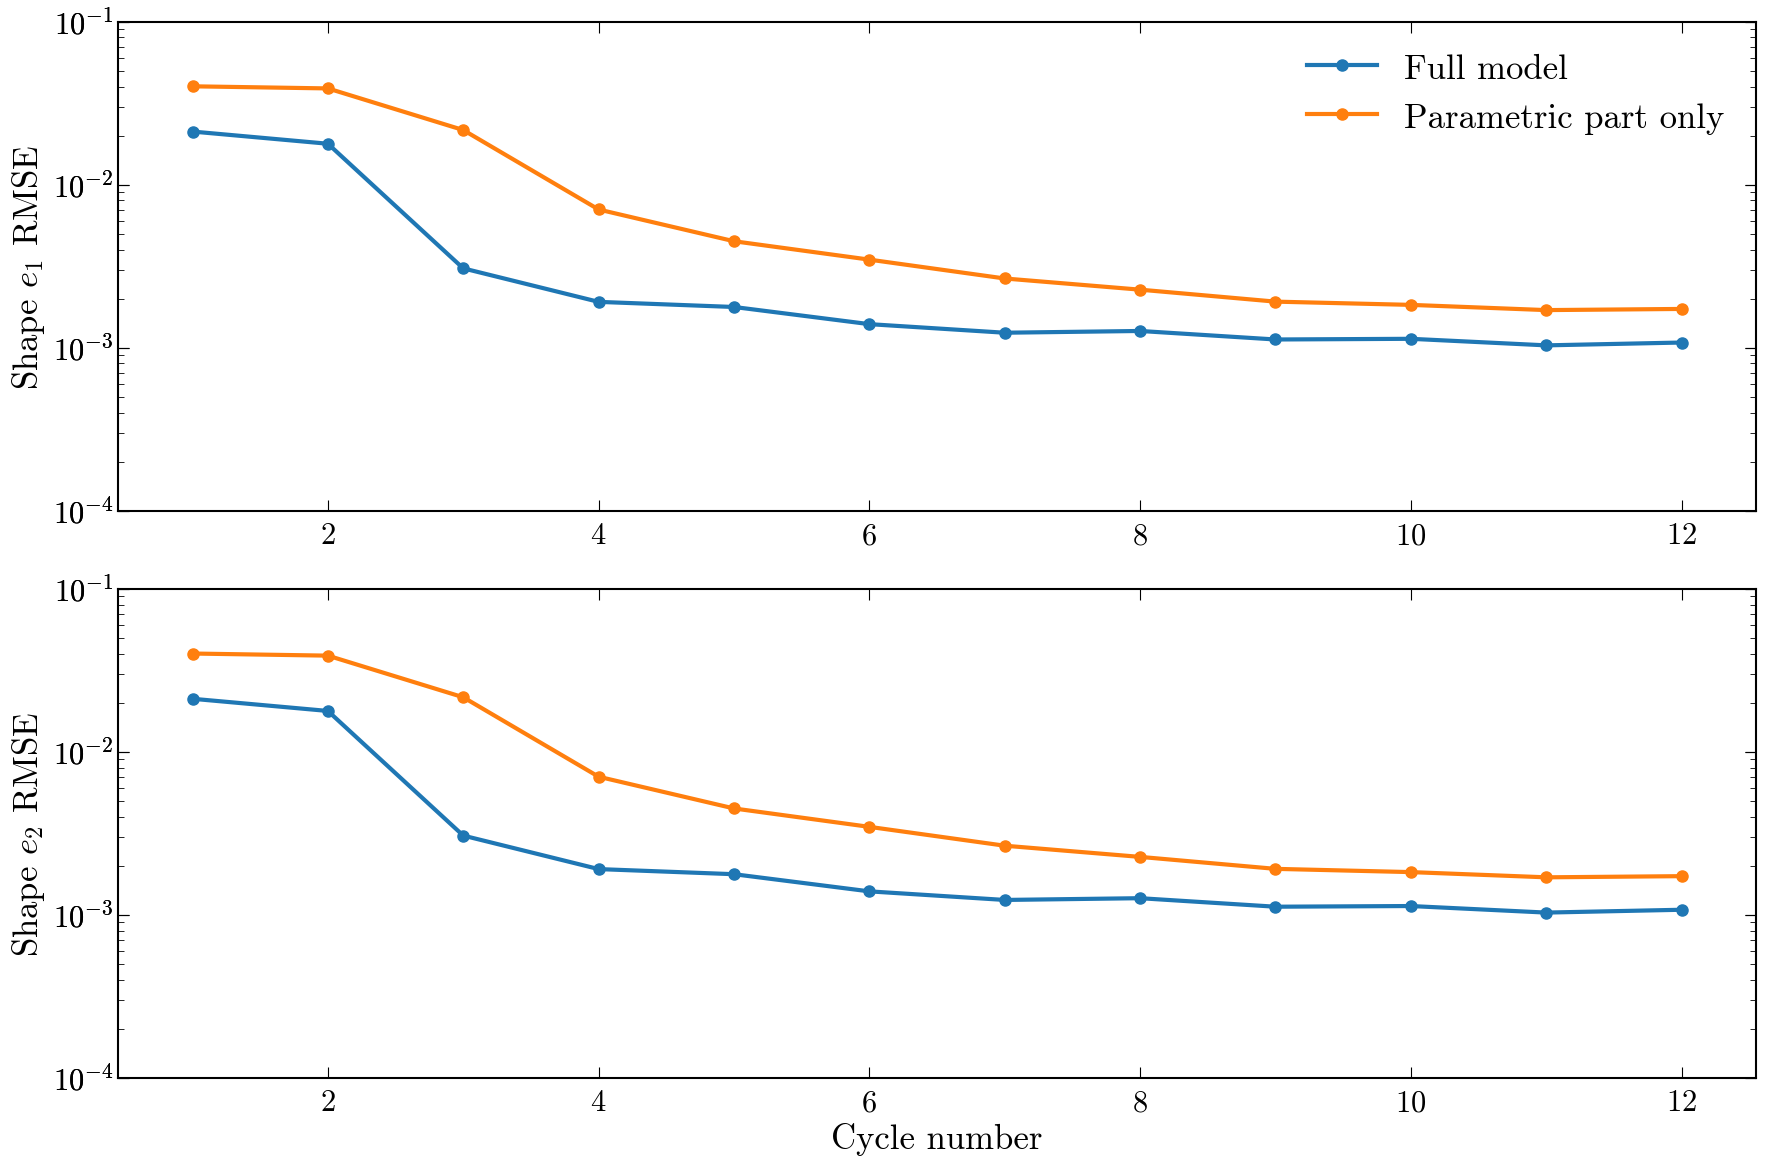

In [13]:

ncycles = np.arange(1,len(test_SR_pix_rel_results[0])+1)

# Define style
# define_plot_style()

fig = plt.figure(figsize=(18,12))
gs = mpl.gridspec.GridSpec(2, 1, height_ratios=[1, 1], hspace=0.08) 


# sns.set(font_scale=1.5)

ax0 = plt.subplot(gs[0])


kwargs = dict(linewidth=3, alpha=1)

ax0.plot(
    ncycles,
    full_NP_model_e1_rmse,
    c=cmap(0),
    label='Full model',
    markersize=16,
    marker=".",
    **kwargs
)
ax0.plot(
    ncycles,
    param_NP_model_e1_rmse,
    c=cmap(1),
    label='Parametric part only',
    markersize=16,
    marker=".",
    **kwargs
)


ax0.set_ylim(1e-4, 1e-1)  # most of the data

ax0.legend(prop={'size': text_fontsize})#, loc='upper right')

ax0.set_yscale('log')
# ax0.set_xscale('log')
# plt.xticks(ncycles)
ax0.get_xaxis().set_major_formatter(mtick.ScalarFormatter())

ax0.get_xaxis().set_tick_params(which='minor', size=0)
ax0.get_xaxis().set_tick_params(which='minor', width=0) 

# ax0.spines['bottom'].set_visible(False)
# ax0.spines['top'].set_visible(False)

# ax0.xaxis.tick_bottom()
# ax0.yaxis.tick_left()

# plt.minorticks_on()
ax0.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
ax0.yaxis.major.formatter._useMathText = True
ax0.xaxis.major.formatter._useMathText = True

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(0.1,1.0, ))
ax0.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1 )) 
ax0.yaxis.set_minor_locator(locmin)
ax0.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

ax0.tick_params(axis='both', which='major', labelsize=maj_tick_size)
# ax0.tick_params(axis='y', which='major', labelsize=maj_tick_size)
# ax0.tick_params(axis='x', which='major', labelsize=maj_tick_size)

ax0.set_ylabel(r'Shape $e_1$ RMSE', fontsize = text_fontsize)   
# ax0.yaxis.set_label_coords(-0.05,0.5, transform=ax1.transAxes)

# ax1.set_xlabel('Relative error in the prior [%]', fontsize = 20)

ax1 = plt.subplot(gs[1])

kwargs = dict(linewidth=3, alpha=1)

ax1.plot(
    ncycles,
    full_NP_model_e1_rmse,
    c=cmap(0),
    label='Full model',
    markersize=16,
    marker=".",
    **kwargs
)
ax1.plot(
    ncycles,
    param_NP_model_e1_rmse,
    c=cmap(1),
    label='Parametric part only',
    markersize=16,
    marker=".",
    **kwargs
)


ax1.set_ylim(1e-4, 1e-1)  # most of the data

# ax1.legend(prop={'size': 18})#, loc='upper right')

ax1.set_yscale('log')


# ax1.set_xscale('log')
# plt.xticks(ncycles)
ax1.get_xaxis().set_major_formatter(mtick.ScalarFormatter())

ax1.get_xaxis().set_tick_params(which='minor', size=0)
ax1.get_xaxis().set_tick_params(which='minor', width=0) 

# ax1.spines['bottom'].set_visible(False)
# ax1.spines['top'].set_visible(False)

# ax1.xaxis.tick_bottom()
# ax1.yaxis.tick_left()

# plt.minorticks_on()
ax1.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
ax1.yaxis.major.formatter._useMathText = True
ax1.xaxis.major.formatter._useMathText = True
ax1.tick_params(axis='both', which='major', labelsize=maj_tick_size)
# ax1.tick_params(axis='y', which='major', labelsize=maj_tick_size)
# ax1.tick_params(axis='x', which='major', labelsize=maj_tick_size)

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(0.1,1.0, ))
ax1.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1 )) 
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

ax1.set_ylabel(r'Shape $e_2$ RMSE', fontsize = text_fontsize)   
# ax1.yaxis.set_label_coords(-0.05,0.5, transform=ax1.transAxes)
ax1.set_xlabel('Cycle number', fontsize = text_fontsize)

gs.tight_layout(fig)
if plot_results:
    plt.savefig(
        '{:s}{:s}'.format(save_dir, 'cycle_evol_rel_e1e2_errors.pdf'),
        bbox_inches='tight',
        dpi=300
    )
plt.show()


## Shape metrics: R2

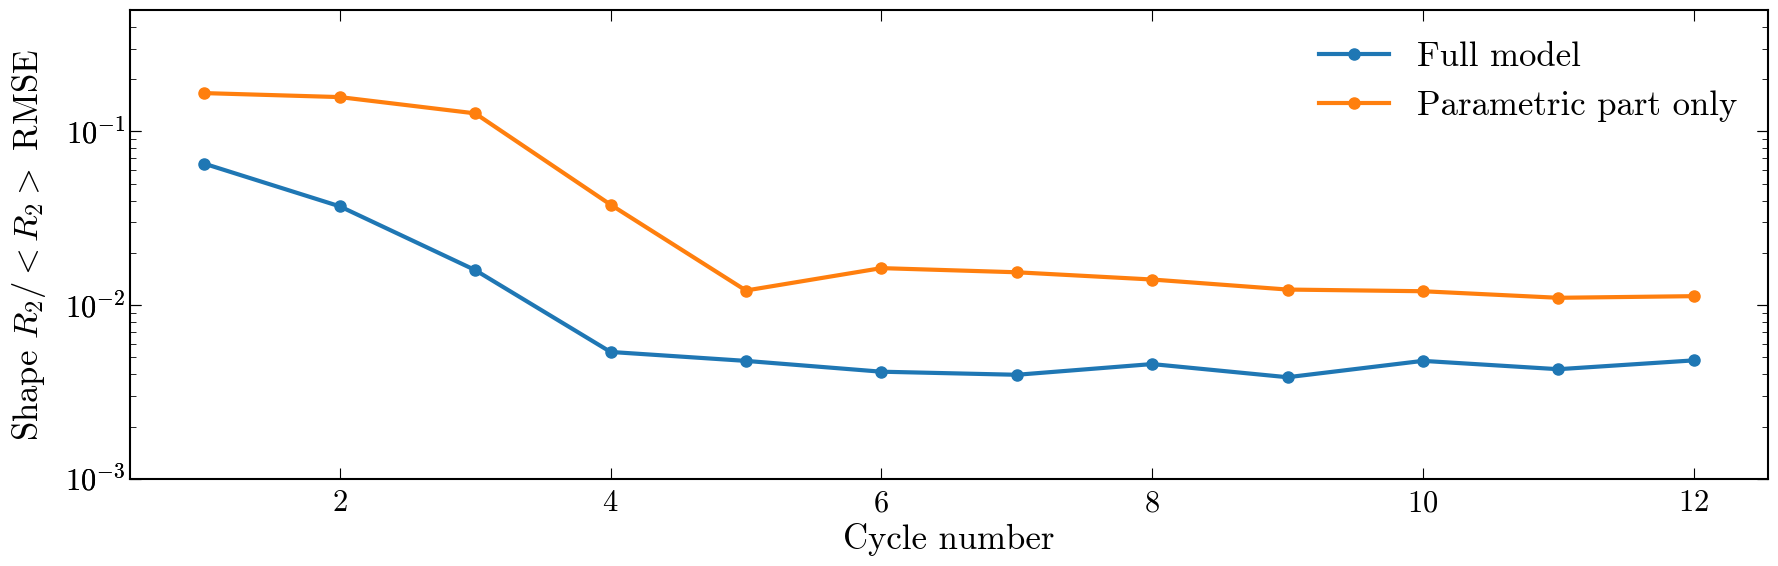

In [14]:

ncycles = np.arange(1,len(test_SR_pix_rel_results[0])+1)

# Define style
# define_plot_style()
# sns.set(font_scale=1.5)


fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot()

kwargs = dict(linewidth=3, alpha=1)

ax1.plot(
    ncycles,
    full_NP_model_rmse_R2_meanR2,
    c=cmap(0),
    markersize=16,
    marker=".",
    label='Full model',
    **kwargs
)
ax1.plot(
    ncycles,
    param_NP_model_rmse_R2_meanR2,
    c=cmap(1),
    label='Parametric part only',
    markersize=16,
    marker=".",
    **kwargs
)


ax1.set_ylim(1e-3, 5e-1)  # most of the data

ax1.legend(prop={'size': text_fontsize})#, loc='upper right')

ax1.set_yscale('log')
# ax1.set_xscale('log')
# plt.xticks(prior_error_per_list[:top_el])
ax1.get_xaxis().set_major_formatter(mtick.ScalarFormatter())

ax1.get_xaxis().set_tick_params(which='minor', size=0)
ax1.get_xaxis().set_tick_params(which='minor', width=0) 

# ax1.spines['bottom'].set_visible(False)
# ax1.spines['top'].set_visible(False)

# ax1.xaxis.tick_bottom()
# ax1.yaxis.tick_left()

# plt.minorticks_on()
ax1.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
ax1.yaxis.major.formatter._useMathText = True
ax1.xaxis.major.formatter._useMathText = True

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(0.1,1.0, ))
ax1.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1 )) 
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

ax1.tick_params(axis='both', which='major', labelsize=maj_tick_size)

ax1.set_ylabel(r'Shape $R_2 / <R_2>$ RMSE', fontsize = text_fontsize)   
ax1.yaxis.set_label_coords(-0.05, 0.5, transform=ax1.transAxes)
ax1.set_xlabel('Cycle number', fontsize = text_fontsize)

plt.tight_layout()
if plot_results:
    plt.savefig(
        '{:s}{:s}'.format(save_dir, 'cycle_evol_rel_R2_error.pdf'),
        bbox_inches='tight',
        dpi=300
    )
plt.show()

